## SBTi Target Status


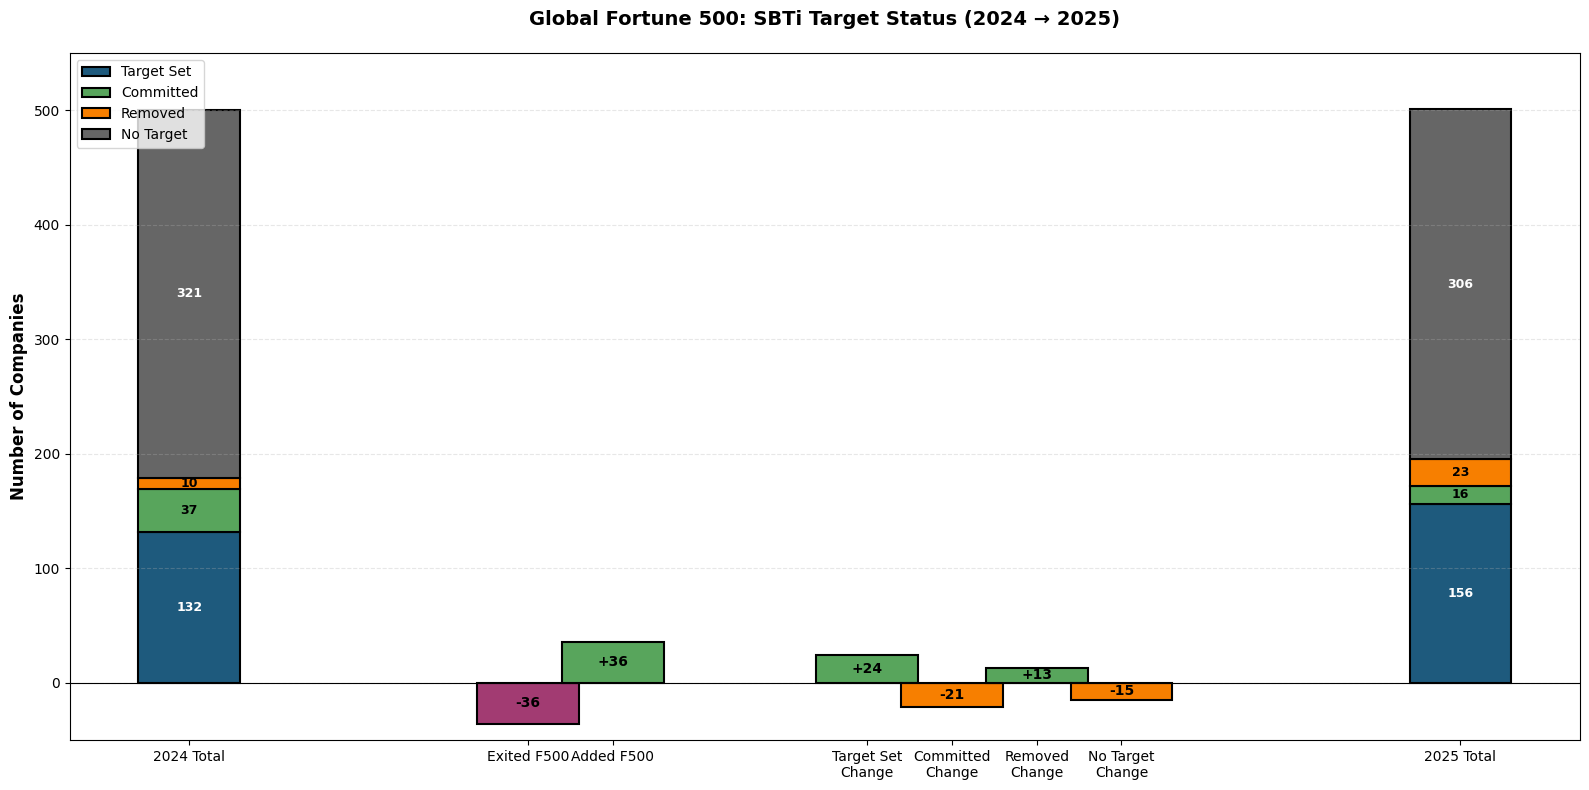

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df_2024 = pd.read_csv('gf5002024.csv', encoding='latin-1')
df_2025 = pd.read_csv('gf5002026.csv', encoding='latin-1')

companies_2024 = set(df_2024['Company Name'].dropna())
companies_2025 = set(df_2025['Company Name'].dropna())

def map_status_2024(row):
    status = str(row['Target status - NT']).strip()
    if status == 'Targets Set': return 'Target Set'
    elif status == 'Committed': return 'Committed'
    elif status == 'Removed': return 'Removed'
    return 'No Target'

def map_status_2025(row):
    status = str(row['Target status (T = target set, C = committed, N=No, R=Removed)']).strip()
    if status in ['Targets set', 'T']: return 'Target Set'
    elif status in ['Committed', 'C']: return 'Committed'
    elif status in ['Removed', 'Commitment removed', 'R']: return 'Removed'
    return 'No Target'

s2024 = df_2024.apply(map_status_2024, axis=1).value_counts().to_dict()
s2025 = df_2025.apply(map_status_2025, axis=1).value_counts().to_dict()

categories = ['2024 Total', 'Exited F500', 'Added F500', 'Target Set\nChange', 
              'Committed\nChange', 'Removed\nChange', 'No Target\nChange', '2025 Total']
values = [500, -len(companies_2024 - companies_2025), len(companies_2025 - companies_2024),
          s2025.get('Target Set', 0) - s2024.get('Target Set', 0),
          s2025.get('Committed', 0) - s2024.get('Committed', 0),
          s2025.get('Removed', 0) - s2024.get('Removed', 0),
          s2025.get('No Target', 0) - s2024.get('No Target', 0), 500]

x_pos = [0, 2, 2.5, 4, 4.5, 5, 5.5, 7.5]
cumulative = [0]
for i, v in enumerate(values[:-1]):
    cumulative.append(v if i == 0 else cumulative[-1] + v)

fig, ax = plt.subplots(figsize=(16, 8))

for i, (x, val) in enumerate(zip(x_pos, values)):
    if i == 0:
        ts, c, r, n = s2024.get('Target Set', 0), s2024.get('Committed', 0), s2024.get('Removed', 0), s2024.get('No Target', 0)
        ax.bar(x, ts, color='#1E5A7D', width=0.6, edgecolor='black', linewidth=1.5, label='Target Set')
        ax.bar(x, c, bottom=ts, color='#58A55C', width=0.6, edgecolor='black', linewidth=1.5, label='Committed')
        ax.bar(x, r, bottom=ts+c, color='#F77F00', width=0.6, edgecolor='black', linewidth=1.5, label='Removed')
        ax.bar(x, n, bottom=ts+c+r, color='#666666', width=0.6, edgecolor='black', linewidth=1.5, label='No Target')
        ax.text(x, ts/2, f'{ts}', ha='center', va='center', fontsize=9, fontweight='bold', color='white')
        ax.text(x, ts+c/2, f'{c}', ha='center', va='center', fontsize=9, fontweight='bold')
        ax.text(x, ts+c+r/2, f'{r}', ha='center', va='center', fontsize=9, fontweight='bold')
        ax.text(x, ts+c+r+n/2, f'{n}', ha='center', va='center', fontsize=9, fontweight='bold', color='white')
    elif i == 7:
        ts, c, r, n = s2025.get('Target Set', 0), s2025.get('Committed', 0), s2025.get('Removed', 0), s2025.get('No Target', 0)
        ax.bar(x, ts, color='#1E5A7D', width=0.6, edgecolor='black', linewidth=1.5)
        ax.bar(x, c, bottom=ts, color='#58A55C', width=0.6, edgecolor='black', linewidth=1.5)
        ax.bar(x, r, bottom=ts+c, color='#F77F00', width=0.6, edgecolor='black', linewidth=1.5)
        ax.bar(x, n, bottom=ts+c+r, color='#666666', width=0.6, edgecolor='black', linewidth=1.5)
        ax.text(x, ts/2, f'{ts}', ha='center', va='center', fontsize=9, fontweight='bold', color='white')
        ax.text(x, ts+c/2, f'{c}', ha='center', va='center', fontsize=9, fontweight='bold')
        ax.text(x, ts+c+r/2, f'{r}', ha='center', va='center', fontsize=9, fontweight='bold')
        ax.text(x, ts+c+r+n/2, f'{n}', ha='center', va='center', fontsize=9, fontweight='bold', color='white')
    else:
        col = '#A23B72' if i == 1 else '#58A55C' if val > 0 else '#F77F00'
        ax.bar(x, abs(val), bottom=0 if val > 0 else val, color=col, width=0.6, edgecolor='black', linewidth=1.5)
        ax.text(x, val/2, f'{val:+d}', ha='center', va='center', fontsize=10, fontweight='bold')

ax.set_xticks(x_pos)
ax.set_xticklabels(categories, fontsize=10)
ax.set_ylabel('Number of Companies', fontsize=12, fontweight='bold')
ax.set_title('Global Fortune 500: SBTi Target Status (2024 → 2025)', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0, color='black', linewidth=0.8)
ax.set_ylim(-50, 550)
plt.tight_layout()
plt.savefig('waterfall_sbti.png', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
import pandas as pd
import plotly.graph_objects as go

df_2024 = pd.read_csv('gf5002024.csv', encoding='latin-1')
df_2025 = pd.read_csv('gf5002026.csv', encoding='latin-1')

def map_status_2024(row):
    status = str(row['Target status - NT']).strip()
    if status == 'Targets Set': return 'Target Set'
    elif status == 'Committed': return 'Committed'
    elif status == 'Removed': return 'Removed'
    return 'No Target'

def map_status_2025(row):
    status = str(row['Target status (T = target set, C = committed, N=No, R=Removed)']).strip()
    if status in ['Targets set', 'T']: return 'Target Set'
    elif status in ['Committed', 'C']: return 'Committed'
    elif status in ['Removed', 'Commitment removed', 'R']: return 'Removed'
    return 'No Target'

companies_2024 = set(df_2024['Company Name'].dropna())
companies_2025 = set(df_2025['Company Name'].dropna())
continuing = companies_2024 & companies_2025

df_2024_indexed = df_2024.set_index('Company Name')
df_2025_indexed = df_2025.set_index('Company Name')

transitions = {}
for company in continuing:
    old = map_status_2024(df_2024_indexed.loc[company])
    new = map_status_2025(df_2025_indexed.loc[company])
    transitions[(old, new)] = transitions.get((old, new), 0) + 1

labels = ['2024: Target Set', '2024: Committed', '2024: Removed', '2024: No Target',
          '2025: Target Set', '2025: Committed', '2025: Removed', '2025: No Target']
label_map = {'Target Set': 0, 'Committed': 1, 'Removed': 2, 'No Target': 3}

source, target, value, link_colors = [], [], [], []

for (old, new), count in transitions.items():
    src = label_map[old]
    tgt = label_map[new] + 4
    source.append(src)
    target.append(tgt)
    value.append(count)
    
    if src == tgt - 4:
        link_colors.append('rgba(200, 200, 200, 0.3)')
    elif src == 0:
        link_colors.append('rgba(30, 90, 125, 0.5)')
    elif src == 1:
        link_colors.append('rgba(88, 165, 92, 0.5)')
    elif src == 2:
        link_colors.append('rgba(247, 127, 0, 0.5)')
    else:
        link_colors.append('rgba(102, 102, 102, 0.5)')

fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, label=labels, 
              color=['#1E5A7D', '#58A55C', '#F77F00', '#666666', '#1E5A7D', '#58A55C', '#F77F00', '#666666']),
    link=dict(source=source, target=target, value=value, color=link_colors)
)])

fig.update_layout(title_text="SBTi Target Status Transitions (2024 → 2025)", font_size=12, height=600)
fig.write_html('sankey_sbti.html')

## RE100

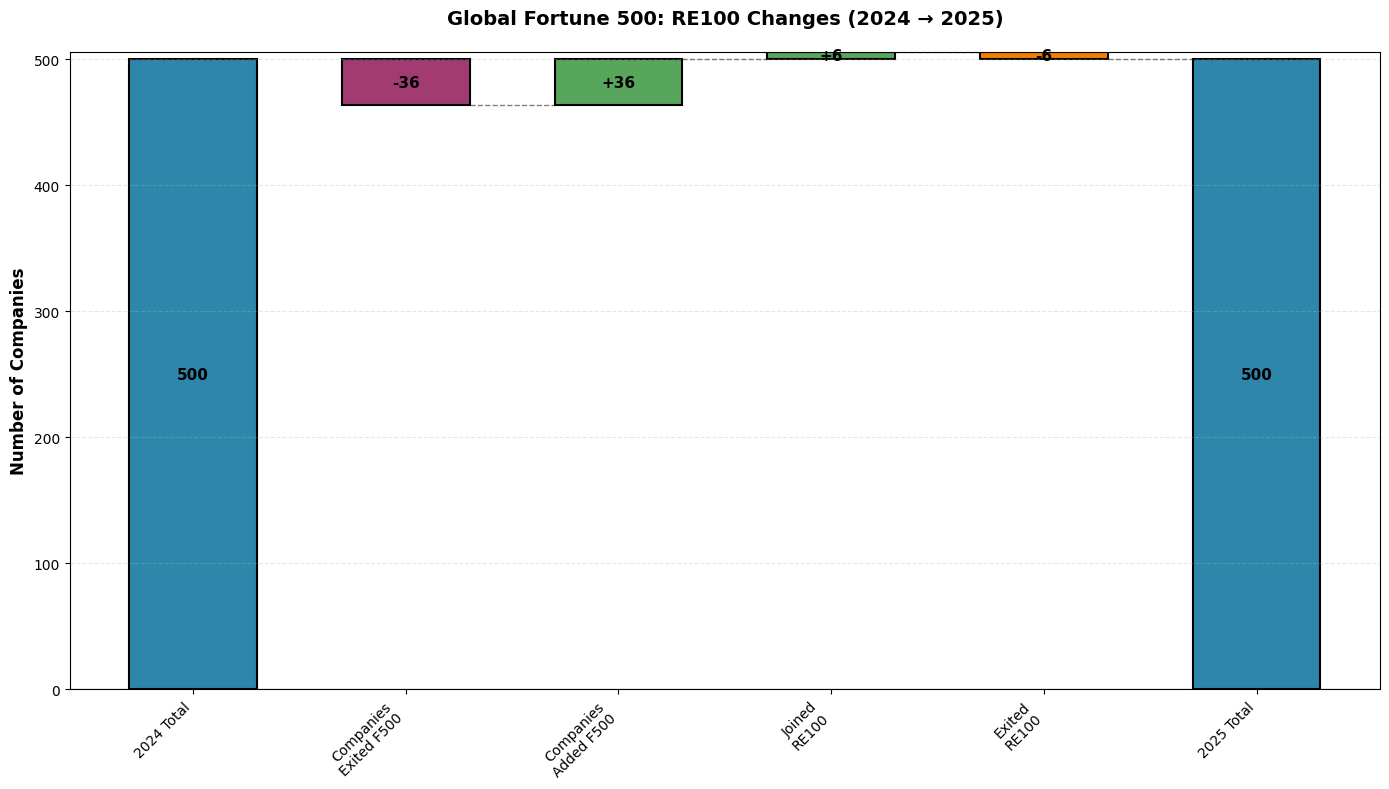

Joined RE100: 6
['Tongwei Group', 'Hon Hai Precision Industry', 'SK', 'Chevron', 'La Poste', 'Commonwealth Bank of Australia']

Exited RE100: 6
['Daiwa House Industry', 'Meta Platforms', 'Capital One Financial', 'Morgan Stanley', 'Siemens', 'Procter & Gamble']


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_2024 = pd.read_csv('gf5002024.csv', encoding='latin-1')
df_2025 = pd.read_csv('gf5002026.csv', encoding='latin-1')

# Get company sets
companies_2024 = set(df_2024['Company Name'].dropna())
companies_2025 = set(df_2025['Company Name'].dropna())
continuing = companies_2024 & companies_2025

# Map RE100 status
def map_re100(row):
    status = str(row['RE100 (Y/N)']).strip()
    return 'In RE100' if status in ['Yes', 'Y'] else 'Not in RE100'

# Track changes for continuing companies
df_2024_indexed = df_2024.set_index('Company Name')
df_2025_indexed = df_2025.set_index('Company Name')

joined = []
exited_re = []

for company in continuing:
    old = map_re100(df_2024_indexed.loc[company])
    new = map_re100(df_2025_indexed.loc[company])
    if old == 'Not in RE100' and new == 'In RE100':
        joined.append(company)
    elif old == 'In RE100' and new == 'Not in RE100':
        exited_re.append(company)

# Build waterfall
categories = ['2024 Total', 'Companies\nExited F500', 'Companies\nAdded F500', 
              'Joined\nRE100', 'Exited\nRE100', '2025 Total']
values = [500, -len(companies_2024 - companies_2025), len(companies_2025 - companies_2024), 
          len(joined), -len(exited_re), 500]
colors = ['#2E86AB', '#A23B72', '#58A55C', '#58A55C', '#F77F00', '#2E86AB']

# Calculate cumulative
cumulative = [0]
for i, val in enumerate(values[:-1]):
    cumulative.append(val if i == 0 else cumulative[-1] + val)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

for i, (cat, val, col) in enumerate(zip(categories, values, colors)):
    if i == 0 or i == len(categories) - 1:
        ax.bar(i, val, color=col, width=0.6, edgecolor='black', linewidth=1.5)
        label_pos = val / 2
        label = f'{val}'
    else:
        ax.bar(i, val, bottom=cumulative[i], color=col, width=0.6, edgecolor='black', linewidth=1.5)
        label_pos = cumulative[i] + val / 2
        label = f'{val:+d}'
        if i < len(categories) - 1:
            ax.plot([i + 0.3, i + 0.7], [cumulative[i+1], cumulative[i+1]], 'k--', linewidth=1, alpha=0.5)
    
    ax.text(i, label_pos, label, ha='center', va='center', fontsize=11, fontweight='bold')

ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Number of Companies', fontsize=12, fontweight='bold')
ax.set_title('Global Fortune 500: RE100 Changes (2024 → 2025)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0, color='black', linewidth=0.8)

plt.tight_layout()
plt.savefig('waterfall_re100.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Joined RE100: {len(joined)}")
print(joined)
print(f"\nExited RE100: {len(exited_re)}")
print(exited_re)

In [22]:
import pandas as pd
import plotly.graph_objects as go

# Load data
df_2024 = pd.read_csv('gf5002024.csv', encoding='latin-1')
df_2025 = pd.read_csv('gf5002026.csv', encoding='latin-1')

# Map RE100 status
def map_re100(row):
    status = str(row['RE100 (Y/N)']).strip()
    return 'In RE100' if status in ['Yes', 'Y'] else 'Not in RE100'

# Get continuing companies
companies_2024 = set(df_2024['Company Name'].dropna())
companies_2025 = set(df_2025['Company Name'].dropna())
continuing = companies_2024 & companies_2025

# Count transitions
df_2024_indexed = df_2024.set_index('Company Name')
df_2025_indexed = df_2025.set_index('Company Name')

transitions = {}
for company in continuing:
    old = map_re100(df_2024_indexed.loc[company])
    new = map_re100(df_2025_indexed.loc[company])
    key = (old, new)
    transitions[key] = transitions.get(key, 0) + 1

# Build Sankey
labels = ['2024: In RE100', '2024: Not in RE100', '2025: In RE100', '2025: Not in RE100']
label_map = {'In RE100': 0, 'Not in RE100': 1}

source = []
target = []
value = []

for (old, new), count in transitions.items():
    source.append(label_map[old])
    target.append(label_map[new] + 2)
    value.append(count)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        label=labels,
        color=['#2E86AB', '#666666', '#2E86AB', '#666666']
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(
    title_text="RE100 Status Transitions (2024 → 2025)",
    font_size=12,
    height=600
)

fig.write_html('sankey_re100.html')

## Carbon Credits


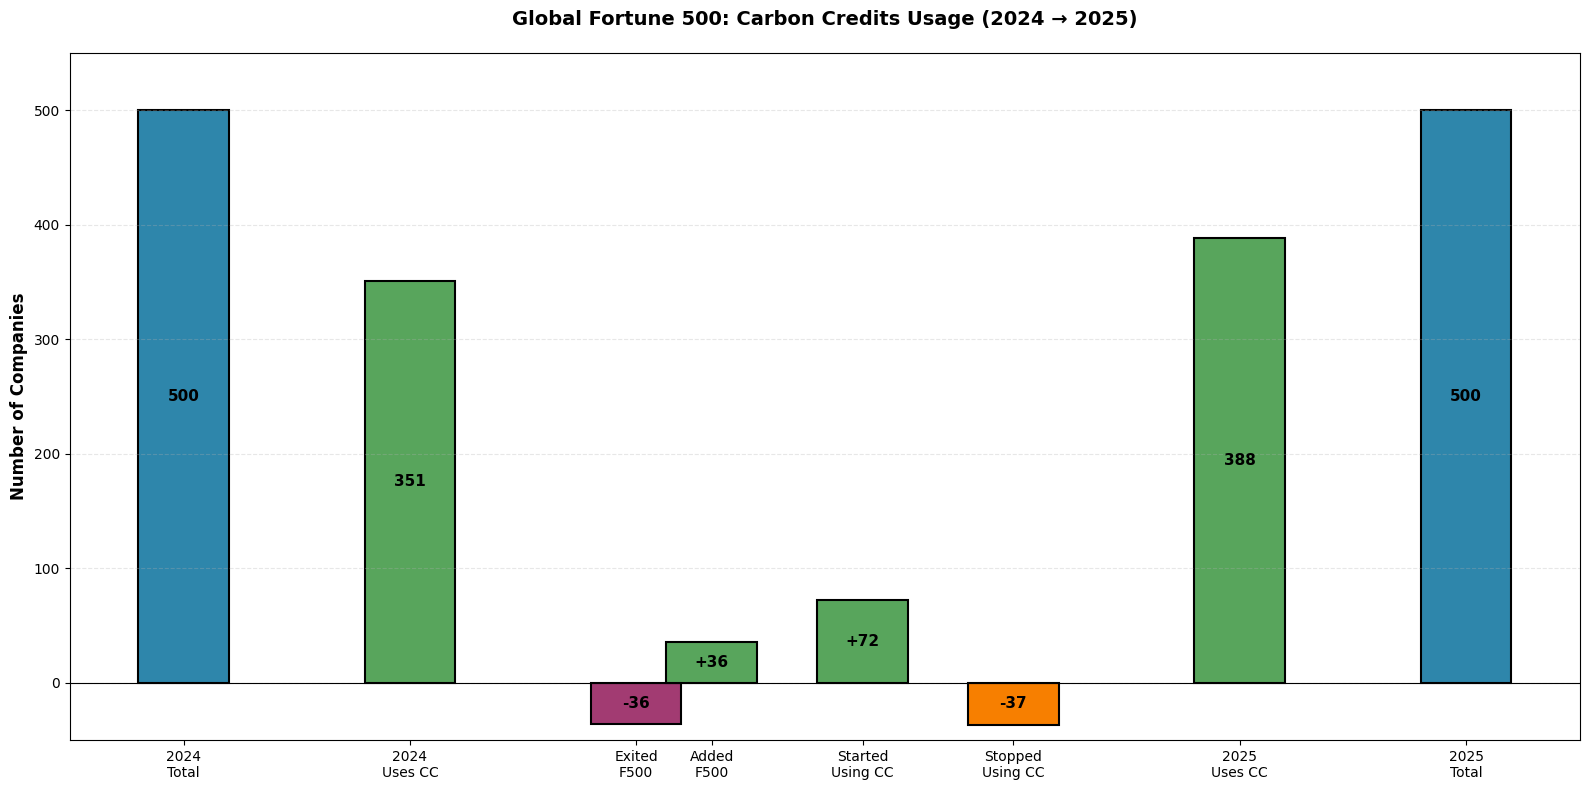

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df_2024 = pd.read_csv('gf5002024.csv', encoding='latin-1')
df_2025 = pd.read_csv('gf5002026.csv', encoding='latin-1')

companies_2024 = set(df_2024['Company Name'].dropna())
companies_2025 = set(df_2025['Company Name'].dropna())
continuing = companies_2024 & companies_2025

def map_cc_2024(row):
    cc1 = str(row['Carbon credits (Y = yes, N = no, R = removals only, U = unclear)']).strip()
    cc2 = str(row['Carbon credits (Y = yes, N = no, R = removals only, U = unclear).1']).strip()
    return 'Uses CC' if cc1 in ['Y', 'R', 'U'] or cc2 in ['Y', 'R', 'U'] else 'No CC'

def map_cc_2025(row):
    cc = str(row['Carbon credits (Y = yes, N = no, R = removals only, U = unclear).1']).strip()
    return 'Uses CC' if cc in ['Yes', 'Y', 'R', 'U', 'Not Specified'] else 'No CC'

df_2024_indexed = df_2024.set_index('Company Name')
df_2025_indexed = df_2025.set_index('Company Name')

cc_2024 = sum(1 for c in companies_2024 if map_cc_2024(df_2024_indexed.loc[c]) == 'Uses CC')
cc_2025 = sum(1 for c in companies_2025 if map_cc_2025(df_2025_indexed.loc[c]) == 'Uses CC')

started = sum(1 for c in continuing if map_cc_2024(df_2024_indexed.loc[c]) == 'No CC' and map_cc_2025(df_2025_indexed.loc[c]) == 'Uses CC')
stopped = sum(1 for c in continuing if map_cc_2024(df_2024_indexed.loc[c]) == 'Uses CC' and map_cc_2025(df_2025_indexed.loc[c]) == 'No CC')

categories = ['2024\nTotal', '2024\nUses CC', 'Exited\nF500', 'Added\nF500', 'Started\nUsing CC', 'Stopped\nUsing CC', '2025\nUses CC', '2025\nTotal']
base_values = [500, cc_2024, -len(companies_2024 - companies_2025), len(companies_2025 - companies_2024), started, -stopped, cc_2025, 500]

fig, ax = plt.subplots(figsize=(16, 8))
x_positions = [0, 1.5, 3, 3.5, 4.5, 5.5, 7, 8.5]

for i, (x, val) in enumerate(zip(x_positions, base_values)):
    if i == 0 or i == 7:
        ax.bar(x, val, color='#2E86AB', width=0.6, edgecolor='black', linewidth=1.5)
        ax.text(x, val/2, f'{val}', ha='center', va='center', fontsize=11, fontweight='bold')
    elif i == 1 or i == 6:
        ax.bar(x, val, color='#58A55C', width=0.6, edgecolor='black', linewidth=1.5)
        ax.text(x, val/2, f'{val}', ha='center', va='center', fontsize=11, fontweight='bold')
    else:
        col = '#A23B72' if i == 2 else '#58A55C' if val > 0 else '#F77F00'
        ax.bar(x, abs(val), bottom=0 if val > 0 else val, color=col, width=0.6, edgecolor='black', linewidth=1.5)
        ax.text(x, val/2, f'{val:+d}', ha='center', va='center', fontsize=11, fontweight='bold')

ax.set_xticks(x_positions)
ax.set_xticklabels(categories, fontsize=10)
ax.set_ylabel('Number of Companies', fontsize=12, fontweight='bold')
ax.set_title('Global Fortune 500: Carbon Credits Usage (2024 → 2025)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0, color='black', linewidth=0.8)
ax.set_ylim(-50, 550)
plt.tight_layout()
plt.savefig('waterfall_carbon_credits.png', dpi=300, bbox_inches='tight')
plt.show()

changes = []
for company in continuing:
    old = map_cc_2024(df_2024_indexed.loc[company])
    new = map_cc_2025(df_2025_indexed.loc[company])
    if old != new:
        changes.append({'Company': company, '2024': old, '2025': new})

pd.DataFrame(changes).to_excel('carbon_credits_changes.xlsx', index=False)

In [40]:
import pandas as pd
import plotly.graph_objects as go

df_2024 = pd.read_csv('gf5002024.csv', encoding='latin-1')
df_2025 = pd.read_csv('gf5002026.csv', encoding='latin-1')

def map_cc_2024(row):
    cc1 = str(row['Carbon credits (Y = yes, N = no, R = removals only, U = unclear)']).strip()
    cc2 = str(row['Carbon credits (Y = yes, N = no, R = removals only, U = unclear).1']).strip()
    return 'Uses CC' if cc1 in ['Y', 'R', 'U'] or cc2 in ['Y', 'R', 'U'] else 'No CC'

def map_cc_2025(row):
    cc = str(row['Carbon credits (Y = yes, N = no, R = removals only, U = unclear).1']).strip()
    return 'Uses CC' if cc in ['Yes', 'Y', 'R', 'U', 'Not Specified'] else 'No CC'

companies_2024 = set(df_2024['Company Name'].dropna())
companies_2025 = set(df_2025['Company Name'].dropna())
continuing = companies_2024 & companies_2025

df_2024_indexed = df_2024.set_index('Company Name')
df_2025_indexed = df_2025.set_index('Company Name')

transitions = {}
for company in continuing:
    old = map_cc_2024(df_2024_indexed.loc[company])
    new = map_cc_2025(df_2025_indexed.loc[company])
    transitions[(old, new)] = transitions.get((old, new), 0) + 1

labels = ['2024: Uses CC', '2024: No CC', '2025: Uses CC', '2025: No CC']
label_map = {'Uses CC': 0, 'No CC': 1}

source, target, value = [], [], []
for (old, new), count in transitions.items():
    source.append(label_map[old])
    target.append(label_map[new] + 2)
    value.append(count)

fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, label=labels, color=['#58A55C', '#666666', '#58A55C', '#666666']),
    link=dict(source=source, target=target, value=value)
)])

fig.update_layout(title_text="Carbon Credits Usage Transitions (2024 → 2025)", font_size=12, height=600)
fig.write_html('sankey_carbon_credits.html')

## Carbon Neutral 


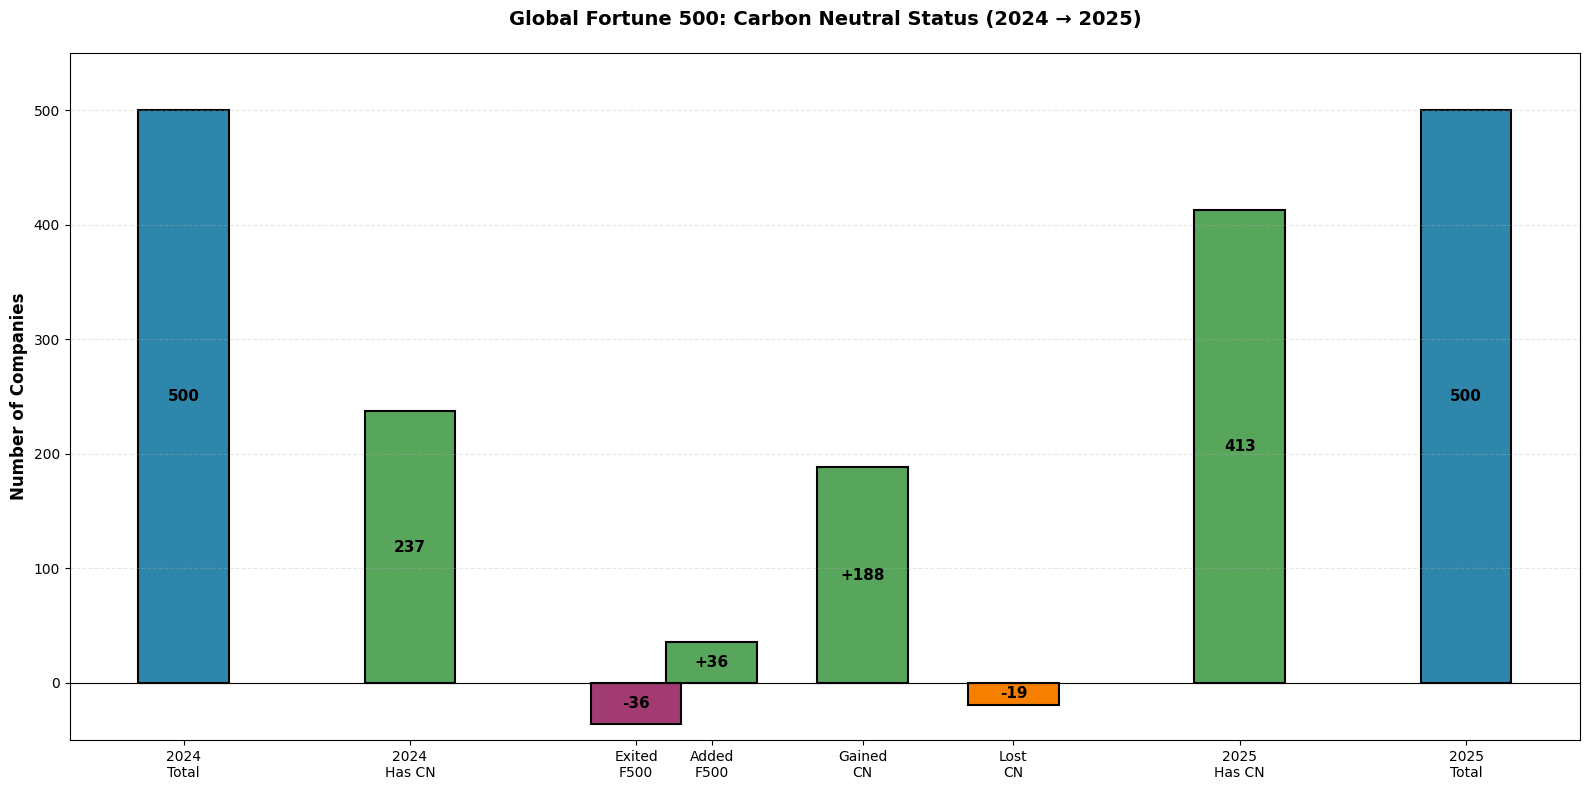

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df_2024 = pd.read_csv('gf5002024.csv', encoding='latin-1')
df_2025 = pd.read_csv('gf5002026.csv', encoding='latin-1')

companies_2024 = set(df_2024['Company Name'].dropna())
companies_2025 = set(df_2025['Company Name'].dropna())
continuing = companies_2024 & companies_2025

def map_cn_2024(row):
    cn = str(row['Carbon neutral commitment (C = company, V = value chain, G= Government, S = subsidiary, U = unspecified, x = less than 50% of rev, N=no)']).strip()
    return 'Has CN' if cn not in ['N', 'nan'] else 'No CN'

def map_cn_2025(row):
    cn = str(row['Carbon neutral commitment (C = company, V = value chain, G= Government, S=Subsidiary,  U = unspecified, N=no)']).strip()
    return 'Has CN' if cn not in ['N', 'nan'] else 'No CN'

df_2024_indexed = df_2024.set_index('Company Name')
df_2025_indexed = df_2025.set_index('Company Name')

cn_2024 = sum(1 for c in companies_2024 if map_cn_2024(df_2024_indexed.loc[c]) == 'Has CN')
cn_2025 = sum(1 for c in companies_2025 if map_cn_2025(df_2025_indexed.loc[c]) == 'Has CN')

gained = sum(1 for c in continuing if map_cn_2024(df_2024_indexed.loc[c]) == 'No CN' and map_cn_2025(df_2025_indexed.loc[c]) == 'Has CN')
lost = sum(1 for c in continuing if map_cn_2024(df_2024_indexed.loc[c]) == 'Has CN' and map_cn_2025(df_2025_indexed.loc[c]) == 'No CN')

categories = ['2024\nTotal', '2024\nHas CN', 'Exited\nF500', 'Added\nF500', 'Gained\nCN', 'Lost\nCN', '2025\nHas CN', '2025\nTotal']
base_values = [500, cn_2024, -len(companies_2024 - companies_2025), len(companies_2025 - companies_2024), gained, -lost, cn_2025, 500]

fig, ax = plt.subplots(figsize=(16, 8))
x_positions = [0, 1.5, 3, 3.5, 4.5, 5.5, 7, 8.5]

for i, (x, val) in enumerate(zip(x_positions, base_values)):
    if i == 0 or i == 7:
        ax.bar(x, val, color='#2E86AB', width=0.6, edgecolor='black', linewidth=1.5)
        ax.text(x, val/2, f'{val}', ha='center', va='center', fontsize=11, fontweight='bold')
    elif i == 1 or i == 6:
        ax.bar(x, val, color='#58A55C', width=0.6, edgecolor='black', linewidth=1.5)
        ax.text(x, val/2, f'{val}', ha='center', va='center', fontsize=11, fontweight='bold')
    else:
        col = '#A23B72' if i == 2 else '#58A55C' if val > 0 else '#F77F00'
        ax.bar(x, abs(val), bottom=0 if val > 0 else val, color=col, width=0.6, edgecolor='black', linewidth=1.5)
        ax.text(x, val/2, f'{val:+d}', ha='center', va='center', fontsize=11, fontweight='bold')

ax.set_xticks(x_positions)
ax.set_xticklabels(categories, fontsize=10)
ax.set_ylabel('Number of Companies', fontsize=12, fontweight='bold')
ax.set_title('Global Fortune 500: Carbon Neutral Status (2024 → 2025)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0, color='black', linewidth=0.8)
ax.set_ylim(-50, 550)
plt.tight_layout()
plt.savefig('waterfall_carbon_neutral.png', dpi=300, bbox_inches='tight')
plt.show()

changes = []
for company in continuing:
    old = map_cn_2024(df_2024_indexed.loc[company])
    new = map_cn_2025(df_2025_indexed.loc[company])
    if old != new:
        changes.append({'Company': company, '2024': old, '2025': new})

pd.DataFrame(changes).to_excel('carbon_neutral_changes.xlsx', index=False)

In [37]:
import pandas as pd
import plotly.graph_objects as go

df_2024 = pd.read_csv('gf5002024.csv', encoding='latin-1')
df_2025 = pd.read_csv('gf5002026.csv', encoding='latin-1')

def map_cn_2024(row):
    cn = str(row['Carbon neutral commitment (C = company, V = value chain, G= Government, S = subsidiary, U = unspecified, x = less than 50% of rev, N=no)']).strip()
    return 'Has CN' if cn not in ['N', 'nan'] else 'No CN'

def map_cn_2025(row):
    cn = str(row['Carbon neutral commitment (C = company, V = value chain, G= Government, S=Subsidiary,  U = unspecified, N=no)']).strip()
    return 'Has CN' if cn not in ['N', 'nan'] else 'No CN'

companies_2024 = set(df_2024['Company Name'].dropna())
companies_2025 = set(df_2025['Company Name'].dropna())
continuing = companies_2024 & companies_2025

df_2024_indexed = df_2024.set_index('Company Name')
df_2025_indexed = df_2025.set_index('Company Name')

transitions = {}
for company in continuing:
    old = map_cn_2024(df_2024_indexed.loc[company])
    new = map_cn_2025(df_2025_indexed.loc[company])
    transitions[(old, new)] = transitions.get((old, new), 0) + 1

labels = ['2024: Has CN', '2024: No CN', '2025: Has CN', '2025: No CN']
label_map = {'Has CN': 0, 'No CN': 1}

source, target, value = [], [], []
for (old, new), count in transitions.items():
    source.append(label_map[old])
    target.append(label_map[new] + 2)
    value.append(count)

fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, label=labels, color=['#58A55C', '#666666', '#58A55C', '#666666']),
    link=dict(source=source, target=target, value=value)
)])

fig.update_layout(title_text="Carbon Neutral Transitions (2024 → 2025)", font_size=12, height=600)
fig.write_html('sankey_carbon_neutral.html')

## Net Zero

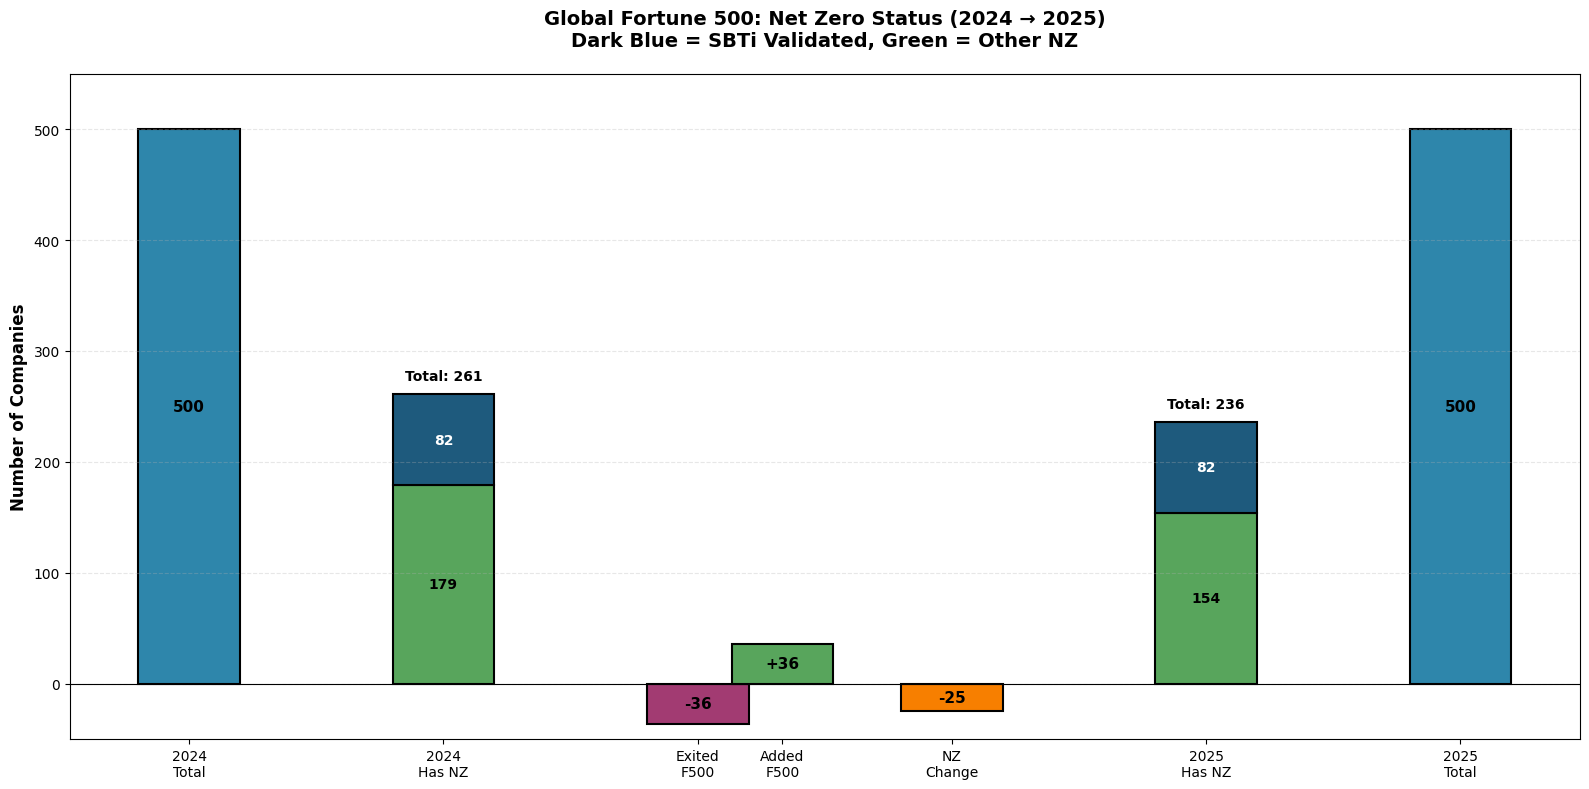

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df_2024 = pd.read_csv('gf5002024.csv', encoding='latin-1')
df_2025 = pd.read_csv('gf5002026.csv', encoding='latin-1')

companies_2024 = set(df_2024['Company Name'].dropna())
companies_2025 = set(df_2025['Company Name'].dropna())
continuing = companies_2024 & companies_2025

def map_nz_2024(row):
    nz = str(row['Net zero commitment (V = value chain, C = company, S = subsidiary, U = unclear, x = less than 50% rev)']).strip()
    sbti = str(row['Net zero committed (SBTi)']).strip()
    if sbti in ['Yes', 'Y']:
        return 'NZ (SBTi)'
    elif nz not in ['N', 'nan', '']:
        return 'NZ (Other)'
    return 'No NZ'

def map_nz_2025(row):
    nz = str(row['Net zero commitment (V = value chain, C = company,  U = unclear, S=Subsidiary)']).strip()
    sbti = str(row['Net zero committed (SBTi) (Y = yes, N = no)']).strip()
    sbti_status = str(row['SBTi NZ Target Status']).strip()
    if sbti in ['Yes', 'Y'] or sbti_status in ['Targets set', 'Targets Set']:
        return 'NZ (SBTi)'
    elif nz not in ['N', 'nan', '']:
        return 'NZ (Other)'
    return 'No NZ'

df_2024_indexed = df_2024.set_index('Company Name')
df_2025_indexed = df_2025.set_index('Company Name')

nz_sbti_2024 = sum(1 for c in companies_2024 if map_nz_2024(df_2024_indexed.loc[c]) == 'NZ (SBTi)')
nz_other_2024 = sum(1 for c in companies_2024 if map_nz_2024(df_2024_indexed.loc[c]) == 'NZ (Other)')
nz_sbti_2025 = sum(1 for c in companies_2025 if map_nz_2025(df_2025_indexed.loc[c]) == 'NZ (SBTi)')
nz_other_2025 = sum(1 for c in companies_2025 if map_nz_2025(df_2025_indexed.loc[c]) == 'NZ (Other)')

nz_total_2024 = nz_sbti_2024 + nz_other_2024
nz_total_2025 = nz_sbti_2025 + nz_other_2025

categories = ['2024\nTotal', '2024\nHas NZ', 'Exited\nF500', 'Added\nF500', 'NZ\nChange', '2025\nHas NZ', '2025\nTotal']
base_values = [500, nz_total_2024, -len(companies_2024 - companies_2025), 
               len(companies_2025 - companies_2024), nz_total_2025 - nz_total_2024, 
               nz_total_2025, 500]

fig, ax = plt.subplots(figsize=(16, 8))
x_positions = [0, 1.5, 3, 3.5, 4.5, 6, 7.5]

for i, (x, val) in enumerate(zip(x_positions, base_values)):
    if i == 0 or i == 6:
        ax.bar(x, val, color='#2E86AB', width=0.6, edgecolor='black', linewidth=1.5)
        ax.text(x, val/2, f'{val}', ha='center', va='center', fontsize=11, fontweight='bold')
    elif i == 1:
        ax.bar(x, nz_other_2024, color='#58A55C', width=0.6, edgecolor='black', linewidth=1.5)
        ax.bar(x, nz_sbti_2024, bottom=nz_other_2024, color='#1E5A7D', width=0.6, edgecolor='black', linewidth=1.5)
        ax.text(x, nz_other_2024/2, f'{nz_other_2024}', ha='center', va='center', fontsize=10, fontweight='bold')
        ax.text(x, nz_other_2024 + nz_sbti_2024/2, f'{nz_sbti_2024}', ha='center', va='center', fontsize=10, fontweight='bold', color='white')
        ax.text(x, val + 10, f'Total: {val}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    elif i == 5:
        ax.bar(x, nz_other_2025, color='#58A55C', width=0.6, edgecolor='black', linewidth=1.5)
        ax.bar(x, nz_sbti_2025, bottom=nz_other_2025, color='#1E5A7D', width=0.6, edgecolor='black', linewidth=1.5)
        ax.text(x, nz_other_2025/2, f'{nz_other_2025}', ha='center', va='center', fontsize=10, fontweight='bold')
        ax.text(x, nz_other_2025 + nz_sbti_2025/2, f'{nz_sbti_2025}', ha='center', va='center', fontsize=10, fontweight='bold', color='white')
        ax.text(x, val + 10, f'Total: {val}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    else:
        col = '#A23B72' if i == 2 else '#58A55C' if val > 0 else '#F77F00'
        ax.bar(x, abs(val), bottom=0 if val > 0 else val, color=col, width=0.6, edgecolor='black', linewidth=1.5)
        ax.text(x, val/2, f'{val:+d}', ha='center', va='center', fontsize=11, fontweight='bold')

ax.set_xticks(x_positions)
ax.set_xticklabels(categories, fontsize=10)
ax.set_ylabel('Number of Companies', fontsize=12, fontweight='bold')
ax.set_title('Global Fortune 500: Net Zero Status (2024 → 2025)\nDark Blue = SBTi Validated, Green = Other NZ', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0, color='black', linewidth=0.8)
ax.set_ylim(-50, 550)
plt.tight_layout()
plt.savefig('waterfall_net_zero.png', dpi=300, bbox_inches='tight')
plt.show()

changes = []
for company in continuing:
    old = map_nz_2024(df_2024_indexed.loc[company])
    new = map_nz_2025(df_2025_indexed.loc[company])
    if old != new:
        changes.append({'Company': company, '2024': old, '2025': new})

pd.DataFrame(changes).to_excel('net_zero_changes.xlsx', index=False)

In [34]:
import pandas as pd
import plotly.graph_objects as go

df_2024 = pd.read_csv('gf5002024.csv', encoding='latin-1')
df_2025 = pd.read_csv('gf5002026.csv', encoding='latin-1')

def map_nz_2024(row):
    sbti = str(row['Net zero committed (SBTi)']).strip()
    nz = str(row['Net zero commitment (V = value chain, C = company, S = subsidiary, U = unclear, x = less than 50% rev)']).strip()
    if sbti in ['Yes', 'Y']:
        return 'NZ (SBTi)'
    elif nz not in ['N', 'nan', '']:
        return 'NZ (Other)'
    return 'No NZ'

def map_nz_2025(row):
    sbti = str(row['Net zero committed (SBTi) (Y = yes, N = no)']).strip()
    sbti_status = str(row['SBTi NZ Target Status']).strip()
    nz = str(row['Net zero commitment (V = value chain, C = company,  U = unclear, S=Subsidiary)']).strip()
    if sbti in ['Yes', 'Y'] or sbti_status in ['Targets set', 'Targets Set']:
        return 'NZ (SBTi)'
    elif nz not in ['N', 'nan', '']:
        return 'NZ (Other)'
    return 'No NZ'

companies_2024 = set(df_2024['Company Name'].dropna())
companies_2025 = set(df_2025['Company Name'].dropna())
continuing = companies_2024 & companies_2025

df_2024_indexed = df_2024.set_index('Company Name')
df_2025_indexed = df_2025.set_index('Company Name')

transitions = {}
for company in continuing:
    old = map_nz_2024(df_2024_indexed.loc[company])
    new = map_nz_2025(df_2025_indexed.loc[company])
    transitions[(old, new)] = transitions.get((old, new), 0) + 1

labels = ['2024: NZ (SBTi)', '2024: NZ (Other)', '2024: No NZ', 
          '2025: NZ (SBTi)', '2025: NZ (Other)', '2025: No NZ']
label_map = {'NZ (SBTi)': 0, 'NZ (Other)': 1, 'No NZ': 2}

source, target, value = [], [], []
for (old, new), count in transitions.items():
    source.append(label_map[old])
    target.append(label_map[new] + 3)
    value.append(count)

fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, label=labels, 
              color=['#1E5A7D', '#58A55C', '#666666', '#1E5A7D', '#58A55C', '#666666']),
    link=dict(source=source, target=target, value=value)
)])

fig.update_layout(title_text="Net Zero Transitions (2024 → 2025)", font_size=12, height=600)
fig.write_html('sankey_net_zero.html')